# Numpy based Logistic Regression on Images classification

    - This is a custom implementation of Logistic Regression using Numpy 
    - This implements a numpy based forward and back propogation on cats and dogs data set
    - Cool implementation and gives a good understanding of how to implement back propogation using chain rule.
    - This example has been developed using the cats & dogs data with 400 training images and 100 testing images
    - Overall the model gives an accuracy of 58% :( on testing dataset but goes a long way in explaining how a basic neural network works with forward and

# Image data setup & download

    - Once we have the data downloaded we will split the data into 3 folders
        - Training
        - Validation
        - Testing
        
    - You could do them manually OR via a program

In [1]:
import os
import numpy as np

base_dir = '.\dataset'

train_dir = os.path.join(base_dir,'training_set') 
train_dogs_dir = os.path.join(train_dir,'dogs') 
train_cats_dir = os.path.join(train_dir,'cats') 

validation_dir = os.path.join(base_dir,'validation_set') 
validation_dogs_dir = os.path.join(validation_dir,'dogs') 
validation_cats_dir = os.path.join(validation_dir,'cats') 

test_dir = os.path.join(base_dir,'test_set') 
test_dogs_dir = os.path.join(test_dir,'dogs') 
test_cats_dir = os.path.join(test_dir,'cats') 

test_dir = os.path.join(base_dir,'test')

#print files count in each dire
print ('Number of files in dogs training images directory are ',len(os.listdir(train_dogs_dir)))
print ('Number of files in cats training images directory are ',len(os.listdir(train_cats_dir)))

print ('Number of files in dogs validation directory are ',len(os.listdir(validation_dogs_dir)))
print ('Number of files in cats validation directory are ',len(os.listdir(validation_cats_dir)))

print ('Number of files in dogs test directory are ',len(os.listdir(test_dogs_dir)))
print ('Number of files in cats test directory are ',len(os.listdir(test_cats_dir)))

Number of files in dogs training images directory are  200
Number of files in cats training images directory are  200
Number of files in dogs validation directory are  100
Number of files in cats validation directory are  100
Number of files in dogs test directory are  50
Number of files in cats test directory are  50


# Images data pre-processing

    - Once downloaded & split into folders we have the images as JPEG files. However before we can feed them into the network we need to convert them into right sized tensors; rough steps we would follow are
    
        - load jpeg files from disk
        - decode jpeg files to pixels grid
        - convert pixels grid to floating point tensors
        - rescale the pixel values (between 0 and 255) to values (between 0 and 1)

In [2]:
# Let's load a sample image and apply this image generator on it.
import os
from keras.preprocessing import image

def load_images(images, path):

    """
    Loads the images from the specified path in a target size of 100*100px. Function then converts the images into an array and flattens the array to a shape of (150*150*3)
    
    Arguments:
    images - list to which all array representation of each loaded image is added
    path - location from where the images files are loaded
    
    Return:
    images - list of array representation of each loaded image found in the specified path
    """
    #get all filenames from the specified path
    fileNames = [os.path.join(path,fname) for fname in os.listdir(path)]

    for i in range (len(fileNames)):

        #select one image name for augmentation
        sample_image_path = fileNames[i] 

        #load sample image
        sample_image = image.load_img(sample_image_path, target_size=(100,100))

        #conver the image to it's array representation
        sample_image = image.img_to_array(sample_image)
        #print ('Shape of each image before adding to list is ', sample_image.shape)
        
        images.append(sample_image)
        
    return images, len(fileNames)

Using TensorFlow backend.


In [3]:
import random

def initialize():
    
    trainImages = []    
    
    trainImages, numberOfDogImages = load_images(trainImages, train_dogs_dir)
    dogLabels = np.zeros((numberOfDogImages,1))
    
    trainImages, numberOfCatImages = load_images(trainImages, train_cats_dir)
    catLabels = np.ones((numberOfCatImages,1))
    
    trainImages = np.array(trainImages)
    trainLabels = np.concatenate((dogLabels, catLabels),axis=0)
    trainLabels = np.array(trainLabels)
    
    testImages = []
    
    testImages, numberOfDogImages = load_images(testImages, test_dogs_dir)
    dogLabels = np.zeros((numberOfDogImages,1))
    
    testImages, numberOfCatImages = load_images(testImages, test_cats_dir)
    catLabels = np.ones((numberOfCatImages,1))
    
    testImages = np.array(testImages)
    testLabels = np.concatenate((dogLabels, catLabels),axis=0)
    testLabels = np.array(testLabels)
    
    num_training_examples = trainImages.shape[0]
    
    return trainImages,testImages, trainLabels, testLabels

In [4]:
def propogate(trainX, trainY, weight, intercept, learning_rate=0.01, epochs=1):
    
    for i in range(0,epochs):
        
        #Forward propogation Starts
        z = np.dot(weight.T,trainX.T)+intercept
        yhat = 1/(1+np.exp(-z))
        #print ('YHat shape is ', yhat.shape)
        #Forward propogation Ends
        
        #Back propogation Starts
        num_training_examples = trainX.shape[0]

        #print ('trainY shape is ', trainY.shape)
        # Find derivative of trainY w.r.t z
        dy = yhat - trainY.T
        
        #print ('Shape of dy is ', dy.shape)
        
        # Find derivative of z w.r.t w
        dzw = np.dot(dy, trainX)/num_training_examples
        dzw = dzw.T
        
        # Find derivative of z w.r.t w
        dzb = np.sum(dy)/num_training_examples
        
        # Update w & b
        weight = weight - learning_rate*dzw
        intercept = intercept - learning_rate*dzb

    return weight,intercept

In [5]:
def initilize_coeffecients(features):
    b = 0.1
    return np.zeros((features,1)), b

In [6]:
from sklearn.metrics import accuracy_score

def predict(images, weights, intercept):
    z = np.dot(weights.T,images.T)+intercept
    yhat = 1/(1+np.exp(-z))
    
    yhat = yhat.reshape(images.shape[0],1)
    yhat[yhat > .5] = 1
    yhat[yhat <= .5] = 0
        
    return yhat

# Function definitions ends - Invocation Starts here 

# 1. Initialize training & testing data

In [7]:
# Initialize the data
trainImages,testImages, trainLabels, testLabels = initialize()

print ('Number of training images is', trainImages.shape[0])
print ('Number of testing images is ', testImages.shape[0])
print ('Shape of train images is ', trainImages.shape)
print ('Shape of train labels is ', trainLabels.shape)
print ('Shape of test images is ', testImages.shape)
print ('Shape of test labels is ', testLabels.shape)

Number of training images is 400
Number of testing images is  100
Shape of train images is  (400, 100, 100, 3)
Shape of train labels is  (400, 1)
Shape of test images is  (100, 100, 100, 3)
Shape of test labels is  (100, 1)


# 2. Flatten the training & testing data from rank 4 to 2

    - Currently our training images dataset has a shape of (200,100,100,3). 
    - This means that there are 200 images in training data set where each image has a shape of (100,100,3)
    - Shape of (100,100,3) means that that image has a heigh=weidth=100 and it's a colored image with 3 channels

In [8]:
trainImages_flatten = trainImages.reshape(trainImages.shape[1]*trainImages.shape[2]*trainImages.shape[3],trainImages.shape[0])
testImages_flatten = testImages.reshape(testImages.shape[1]*testImages.shape[2]*testImages.shape[3],testImages.shape[0])

trainImages_flatten = trainImages_flatten.T
testImages_flatten = testImages_flatten.T

print ('Number of training images is', trainImages_flatten.shape[1])
print ('Number of testing images is ', testImages_flatten.shape[1])
print ('Shape of train images is ', trainImages_flatten.shape)
print ('Shape of train labels is ', trainLabels.shape)
print ('Shape of test images is ', testImages_flatten.shape)
print ('Shape of test labels is ', testLabels.shape)

Number of training images is 30000
Number of testing images is  30000
Shape of train images is  (400, 30000)
Shape of train labels is  (400, 1)
Shape of test images is  (100, 30000)
Shape of test labels is  (100, 1)


# 4. Standardize the training & test dataset

In [9]:
# Standardize our dataset
trainImages_flatten = trainImages_flatten/255
testImages_flatten = testImages_flatten/255

# 5. Shuffle the dataset (both the images and the labels)

In [10]:
from sklearn.utils import shuffle

trainImages_flatten,trainLabels = shuffle(trainImages_flatten, trainLabels, random_state=0)
testImages_flatten,testLabels = shuffle(testImages_flatten, testLabels, random_state=0)

# 6. # Train the model with different epochs and then plot to see which epoch gives best accuracy

In [11]:
from sklearn.metrics import accuracy_score
import datetime

train_accuracy = []
test_accuracy = []
epochs = [2000]

for i, epoc in enumerate(epochs):

    # Initialize weights at the start of each epoch
    features = trainImages_flatten.shape[1]
    weights, intercept = initilize_coeffecients(features)

    # get start time for this epoch
    tic = datetime.datetime.now()
    
    # Find the weights & intercepts
    weights, intercept = propogate(trainImages_flatten, trainLabels, weights, intercept, learning_rate=0.01,epochs=epoc)

    # Check accuracy on training data by making a prediction on training images - should come close to 100%
    predictedTrainingLabel = predict(trainImages_flatten, weights, intercept)
    trainining_accuracy = accuracy_score(trainLabels, predictedTrainingLabel)

    # Check accuracy on testing data by making a prediction on testing images - this should be a good %
    predictedYOnTestData = predict(testImages_flatten, weights, intercept)
    testing_accuracy = accuracy_score(testLabels, predictedYOnTestData)
    
    # Append the training & testing accuracy for future plotting
    train_accuracy.append(trainining_accuracy)
    test_accuracy.append(testing_accuracy)
    
    # get end time for this epoch
    toc = datetime.datetime.now()
    
    print ('Training completed for %d epocs in %s seconds'%(epoc,(toc-tic)))
    

Training completed for 2000 epocs in 0:06:03.476247 seconds


# Draw accuracy graph for different Epoch values

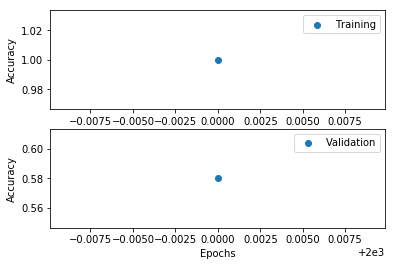

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

figure = plt.figure()

ax1 = figure.add_subplot(211)
plt.scatter(epochs, train_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Training'])

ax1 = figure.add_subplot(212)
plt.scatter(epochs, test_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Validation'])

plt.show()

# Conclusion 
    - We see that the model predicts with an accuracy of around 58% on testing dataset

In [13]:
print (test_accuracy)

[0.58]
